### <p style='color:green;' ><i>Autores</i></p>
<p>Arthur R. B. P. Barata</p>
<p style='margin:0;' >Sara Selis N. Soares</p>

<p><h1>SFW <small> - Stefanini Fashion Week</small></h1></p>

A Stefanini estava se preparando para realizar a primeira Fashion Week tecnológica do mundo, sua roupas são feitas com tecnologia de ponta, algumas contendo até inteligência artificial para se adaptar aos gostos que seus clientes. Porém, como foi a primeira vez que a Stefanini está realizando um evento desse estilo nem tudo poderia ser perfeito, as roupas que deveriam chegar uma semana antes estavam previstas para chegar algumas horas antes do evento.

Como é uma quantidade absurda de roupas, um ser humano não ia conseguir classificar e separar tudo a tempo, porém como a Stefanini tem funcionários experientes na área de inteligência artificial, foi então demandado a eles treinar um algoritmo capaz de classificar as roupas entre:

- 0 - Camiseta
- 1 - Calça
- 2 - Pulôver
- 3 - Vestido
- 4 - Casaco
- 5 - Sandália
- 6 - Camisa
- 7 - Tênis
- 8 - Bolsa
- 9 - Tornozeleira

O Dataset a ser utilizado para desenvolver esse modelo foi o famoso Fashion-Mnist e foi carregado pelo tensorflow.

É exigido que para esse modelo seja feito um <b>Multilayer Perceptron</b>. O Framework a ser escolhido é de preferência do desenvolvedor.

<b>É necessário por comentários explicando o código</b>

\* <small>Quem desenvolver o modelo em Numpy terá uma melhor avaliação que os demais</small>

### Importações necessárias

In [1]:
import matplotlib.pyplot  as plt
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import numpy as np

### Dateset carregado

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Exemplos de imagens: 


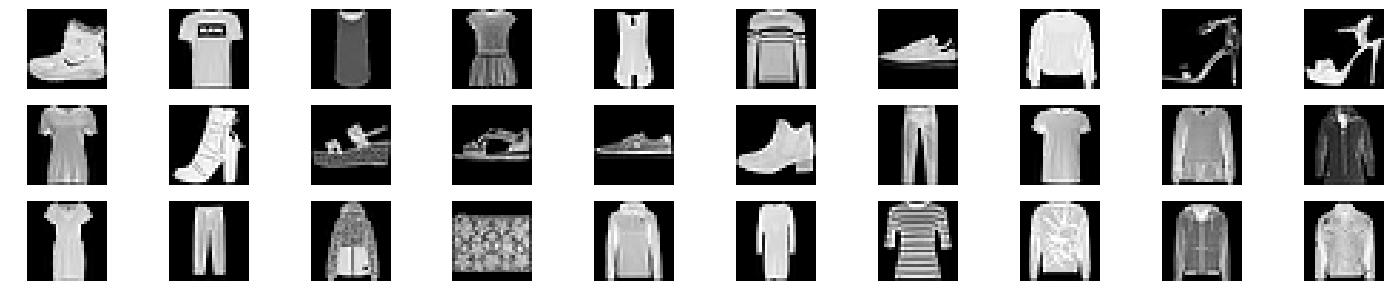

In [3]:
fig, axs = plt.subplots(3,10, figsize=(25,5))
axs = axs.flatten()

for img, ax in zip(X_train[:30], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

print('Exemplos de imagens: ')
plt.show()

## To be continued...

In [4]:
# guardando imadem para futuros testes
import random
amstr_rnd = random.randint(0,len(X_test))

img_test = X_test[amstr_rnd]
label_test = y_test[amstr_rnd]

In [5]:
# aqui é capturado o shape de entrada para ficar mais fácil de fazer o reshape
train_shape = X_train.shape
test_shape = X_test.shape

# aqui é feito o reshape porque a imagem é uma matriz e, como a mlp só aceita um array 
# como entrada, trasformamos a matriz em um array sem perder o conteúdo
X_train = X_train.reshape(train_shape[0], train_shape[1]*train_shape[2])
X_test = X_test.reshape(test_shape[0], test_shape[1]*test_shape[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# aqui normalizamos os dados para que os pesos da IA não explodam
X_train /= 255
X_test /= 255

# aqui fazemos o onehot pois usamos ategorical cross entropy como otimizador
# exigindo que o label esteja em onehot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

### <p style='color:magenta;'>Aqui é feito o modelo</p>
<p>usamos uma função em vez do default, porque fica mais facil de mudar os parâmetros do modelo</p>

In [6]:
def my_model(input_shape, n_output):
    # escolhemos a função de ativação elu por se tratar de uma função que não prejudica muitos neurônios
    model = Sequential()
    
    # colocamos mais neurônios na primeira camada já que existem mais características de baixo nível 
    # que características de alto nível, fazendo com que necessitem de mais neurônios nos primeiros layers
    model.add(Dense(200, activation=tf.nn.elu, input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation=tf.nn.elu))
    
    model.add(Dense(n_output, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [7]:
model = my_model(X_train[0].shape, 10)

model.fit(X_train, y_train_cat, epochs=10, batch_size=30, validation_data=(X_test, y_test_cat))

W0715 16:53:05.342519 139977140209472 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4914 - acc: 0.8218 - val_loss: 0.4233 - val_acc: 0.8424
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3800 - acc: 0.8599 - val_loss: 0.4030 - val_acc: 0.8553
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3462 - acc: 0.8718 - val_loss: 0.3967 - val_acc: 0.8593
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3213 - acc: 0.8793 - val_loss: 0.3528 - val_acc: 0.8745
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3027 - acc: 0.8868 - val_loss: 0.3549 - val_acc: 0.8744
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2882 - acc: 0.8918 - val_loss: 0.3248 - val_acc: 0.8843
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2747 - acc: 0.8972 - val_loss: 0.

In [8]:
scores = model.evaluate(X_test, y_test_cat)
print("Loss: %.4f | Loss: %.4f" %(scores[0], scores[1]))

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3198 - acc: 0.8871
Loss: 0.3198 | Loss: 0.8871


### <p style='color:blue;'>Versão tensorflow</p>

In [9]:
tf.reset_default_graph()

In [10]:
# aqui é definido os placeholders (variáveis que serão preenchidas com arrays de dados futuramente)
X = tf.placeholder(tf.float32, shape=(None, 28*28))
y = tf.placeholder(tf.int32, shape=(None))

In [11]:
# aqui criamos as camadas da mlp, usamos como na parte anterior a função de ativação elu
hidden1 = tf.layers.dense(X, units=200, activation=tf.nn.elu)
hidden2 = tf.layers.dense(hidden1, units=100, activation=tf.nn.elu)
logits = tf.layers.dense(hidden2, units=10)

W0715 16:53:43.004347 139977140209472 deprecation.py:323] From <ipython-input-11-eae17472ae5c>:2: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [12]:
# aqui calculamos a probabilidade da classe e a loss
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)

In [13]:
# aqui definimos o otimizador e passamos para ele a loss 
# para que ele possa recalcular os pesos com base no erro
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [14]:
# aqui fazemos a diferença entre a resposta certa 
# e a resposta predizida para calcular a acurácia
correct_ans = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct_ans, tf.float32))

In [15]:
# aqui definimos o inicializador das variáveis do grafo e o saver, que vai salvar o modelo treinado
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [16]:
# aqui definimos uma função que pega batchs de dados aleatoriamente
# assim a ia não treina sempre com a mesma sequência de dados
# dando mais confiança ao modelo
def batchs_aleatorios(X, y, batch_size):
    idx_a = np.random.permutation(len(X))
    btch_num = len(X) // batch_size
    for batch_idx in np.array_split(idx_a, btch_num):
        yield X[batch_idx], y[batch_idx]

In [17]:
n_epochs = 10
batch_size = 30

# aqui rodamos o treinamento e calculamos a loss e a acurácia de cada época
with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for X_batch, y_batch in batchs_aleatorios(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_test, y: y_test})
        loss_val = loss.eval(feed_dict={X: X_test, y: y_test})
        print(f"Epoch: {epoch} | Acc: %.4f | Loss: %.4f" %(acc_val, loss_val) )
        
    saver.save(sess, "./models/model_mlp.ckpt")

Epoch: 0 | Acc: 0.8526 | Loss: 0.4005
Epoch: 1 | Acc: 0.8609 | Loss: 0.3796
Epoch: 2 | Acc: 0.8686 | Loss: 0.3585
Epoch: 3 | Acc: 0.8727 | Loss: 0.3568
Epoch: 4 | Acc: 0.8703 | Loss: 0.3546
Epoch: 5 | Acc: 0.8800 | Loss: 0.3275
Epoch: 6 | Acc: 0.8731 | Loss: 0.3615
Epoch: 7 | Acc: 0.8816 | Loss: 0.3417
Epoch: 8 | Acc: 0.8854 | Loss: 0.3332
Epoch: 9 | Acc: 0.8840 | Loss: 0.3273


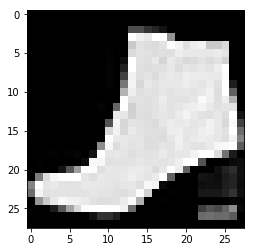

W0715 16:54:09.466204 139977140209472 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


predicted: [9], real_value: 9


In [18]:
# aqui estamos usando o modelo treinado para predizer uma imagem do banco de teste
img_test_entry = X_test[amstr_rnd]
label_test_exit = y_test[amstr_rnd]

plt.imshow(img_test, cmap='gray')
plt.show()


with tf.Session() as sess:
    saver.restore(sess, './models/model_mlp.ckpt')
    
    z = logits.eval(feed_dict={X: [img_test_entry] })
    y_pred = np.argmax(z, axis=1)

print(f"predicted: {y_pred}, real_value: {label_test_exit}")